In [3]:
pip install twython

/usr/local/lib/python3.7/dist-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
    ticker  ...                                              title
0     AMZN  ...  Amazon to Hire 10,000 Jobs After U.K. Emerges ...
1     AMZN  ...  Amazon creates 10,000 UK jobs to meet surging ...
2     AMZN  ...  Big companies follow big government: Morning B...
3     AMZN  ...        Amazon to create 10,000 new jobs in Britain
4     AMZN  ...  UPDATE 1-Amazon to create 10,000 jobs in Brita...
..     ...  ...                                                ...
295     FB  ...  Facebooks Trump Verdict Renews Calls to Revoke...
296     FB  ...  Facebook Chats Power a New $48 Billion Market ...
297     FB  ...  Facebook removes Ukraine political 'influence-...
298     FB  ...  Facebook removes Ukraine political 'influence-...
299     FB  ...  Facebook Removes Inauthentic Networks From Pal...

[300 rows x 4 columns]
0      Amazon to Hire 10,000 Jobs After U.K. Emerges ...
1      Amazon creates 10,000 UK jobs to meet su

<Figure size 1440x720 with 0 Axes>

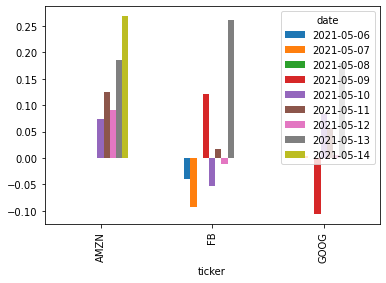

<Figure size 1440x720 with 0 Axes>

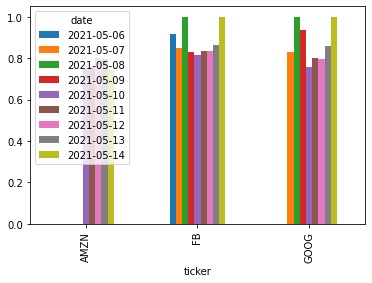

<Figure size 1440x720 with 0 Axes>

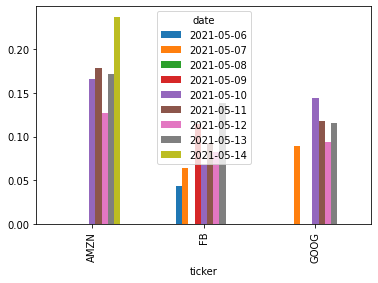

<Figure size 1440x720 with 0 Axes>

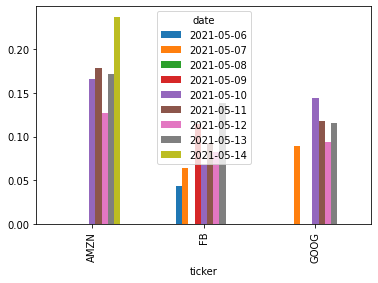

In [1]:
from urllib.request import urlopen, Request
from bs4 import BeautifulSoup
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import pandas as pd
import matplotlib.pyplot as plt
import nltk
nltk.download('vader_lexicon')
finviz_url = 'https://finviz.com/quote.ashx?t='
tickers = ['AMZN', 'GOOG', 'FB']

news_tables = {}
for ticker in tickers:
    url = finviz_url + ticker

    req = Request(url=url, headers={'user-agent': 'my-app'})
    response = urlopen(req)

    html = BeautifulSoup(response, features='html.parser')
    news_table = html.find(id='news-table')
    news_tables[ticker] = news_table

parsed_data = []

for ticker, news_table in news_tables.items():

    for row in news_table.findAll('tr'):

        title = row.a.text
        date_data = row.td.text.split(' ')

        if len(date_data) == 1:
            time = date_data[0]
        else:
            date = date_data[0]
            time = date_data[1]

        parsed_data.append([ticker, date, time, title])

df = pd.DataFrame(parsed_data, columns=['ticker', 'date', 'time', 'title'])
df1 = pd.DataFrame(parsed_data, columns=['ticker', 'date', 'time', 'title'])
print(df)

vader = SentimentIntensityAnalyzer()

print (df['title'])
f = lambda title: vader.polarity_scores(title)['compound']
df['compound'] = df['title'].apply(f)
f2 = lambda title: vader.polarity_scores(title)['pos']
df['pos'] = df['title'].apply(f2)
f3 = lambda title: vader.polarity_scores(title)['neg']
df['neg'] = df['title'].apply(f2)
f4 = lambda title: vader.polarity_scores(title)['neu']
df['neu'] = df['title'].apply(f2)


print(df)




f = lambda title: vader.polarity_scores(title)['compound']

df['compund'] = df['title'].apply(f)
df['date'] = pd.to_datetime(df.date).dt.date

f1 = lambda title: vader.polarity_scores(title)['neu']
df1['neu'] = df1['title'].apply(f1)
df1['date'] = pd.to_datetime(df.date).dt.date







plt.figure(figsize=(20,10))
mean_df = df.groupby(['ticker', 'date']).mean().unstack()
mean_df = mean_df.xs('compound', axis="columns")
mean_df.plot(kind='bar')
plt.show()


plt.figure(figsize=(20,10))
mean_df1 = df1.groupby(['ticker', 'date']).mean().unstack()
mean_df1 = mean_df1.xs('neu', axis="columns")
mean_df1.plot(kind='bar')
plt.show()

plt.figure(figsize=(20,10))
mean_df = df.groupby(['ticker', 'date']).mean().unstack()
mean_df = mean_df.xs('neg', axis="columns")
mean_df.plot(kind='bar')
plt.show()

plt.figure(figsize=(20,10))
mean_df = df.groupby(['ticker', 'date']).mean().unstack()
mean_df = mean_df.xs('pos', axis="columns")
mean_df.plot(kind='bar')
plt.show()



In [4]:
f = lambda title: vader.polarity_scores(title)['compound']
df['compound'] = df['title'].apply(f)
f2 = lambda title: vader.polarity_scores(title)['pos']
df['pos'] = df['title'].apply(f2)
f3 = lambda title: vader.polarity_scores(title)['neg']
df['neg'] = df['title'].apply(f2)
f4 = lambda title: vader.polarity_scores(title)['neu']
df['neu'] = df['title'].apply(f2)


print(df)


    ticker        date       time  ...    neg    neu  compund
0     AMZN  2021-05-14  06:11AM    ...  0.159  0.159   0.1779
1     AMZN  2021-05-14  06:07AM    ...  0.336  0.336   0.3182
2     AMZN  2021-05-14  06:02AM    ...  0.000  0.000   0.0000
3     AMZN  2021-05-14  05:05AM    ...  0.388  0.388   0.4215
4     AMZN  2021-05-14  04:55AM    ...  0.189  0.189   0.2732
..     ...         ...        ...  ...    ...    ...      ...
295     FB  2021-05-06  05:03PM    ...  0.307  0.307   0.2732
296     FB  2021-05-06  05:00PM    ...  0.000  0.000   0.0000
297     FB  2021-05-06  03:57PM    ...  0.000  0.000   0.0000
298     FB  2021-05-06  03:49PM    ...  0.000  0.000   0.0000
299     FB  2021-05-06  02:00PM    ...  0.000  0.000   0.0000

[300 rows x 9 columns]
